<a href="https://colab.research.google.com/github/Am1rTl/Info/blob/main/Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Введение

## 1) Характеристики набора данных

В наборе данных представлна информация о составе стёкол.

Характеристика |	Описание
--- | ---
Ri |	Коэффициент преломления
Na |	Процентное содержание натрия
Mg |	Процентное содержание магния
Al |	Процентное содержание аллюминия
Si |	Процентное содержание кремния
K |	Процентное содержание калия
Сa | Процентное содержание кальция
Ba | Процентное содержание бария
Fe | Процентное содержание железа
Type | Тип стекла

## 2) Задание

Построить классификатор, позволяющий отнести стекло к одному из классов. Целевой признак находится в столбце Type.

## 3) Загрузка данных

Загрузить набор данных Glass.xlsx в сесионное хранилище.
Создать DataFrame. Имена столбцов взять из первой строки файла.

In [59]:
#Импортировать
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score


sns.set(style="whitegrid")

In [60]:
#Загрузить набор данных, создать объеект класса DataFrame
df = pd.read_excel('Glass.xlsx')

In [61]:
#Вывести первые 5 строк набора данных
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 4) Изучение набора данных

## 4.1) Определение типов столбцов

In [62]:
#Вывести информацию о типах столбцов набора данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# 4.2) Проверка наличия отсутствующих значений

In [63]:
#Ваш код для определения наличия пропушенных значений.
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


#4.3) Заполнение отсутствующих значений или удаление строк с отсутсвующими значениями

Пункт выполняется если в наборе данныъ есть отсутствующие значения

In [64]:
#Ваш код для заполнения пропущенных значений, при необходимости.

## 4.3) Изучение статистических показателей набора данных

In [65]:
#Выведите статичтичесие характеристики набора данных
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#Выводы по разделу 4

# 5) Исследовательский анализ данных

# 5.1) Анализ корреляционной матрицы

In [66]:
#Сформировать корреляционную матрицу для исследуемого набора данных
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#Выводы по разделу 5

## 6) Визуализация данных

Выбрать 4 **существенных** признака.

Под **существенным** будем понимать признак, коэффициент корреляции которого с целевым признаком превышает по абсолютной величине 0.5. Если таких признаков нет, считать существенными все признаки.

Построить гистограмму для каждого из существенных признаков с группировкой по целевому признаку.

In [67]:
target_corr = abs(corr_matrix['Type']).sort_values(ascending=False)
significant_features = target_corr[target_corr > 0.5].index.drop('Type', errors='ignore').tolist()
print(f"Существенные признаки: {significant_features}")

Существенные признаки: ['Mg', 'Al', 'Ba', 'Na']


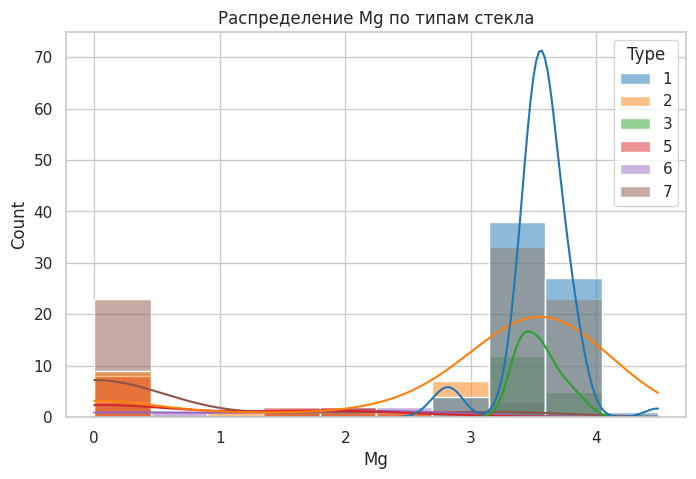

In [68]:
#Код для формирования первой гистограммы
if len(significant_features) >= 1:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=significant_features[0], hue="Type", palette="tab10", kde=True)
    plt.title(f"Распределение {significant_features[0]} по типам стекла")
    plt.show()

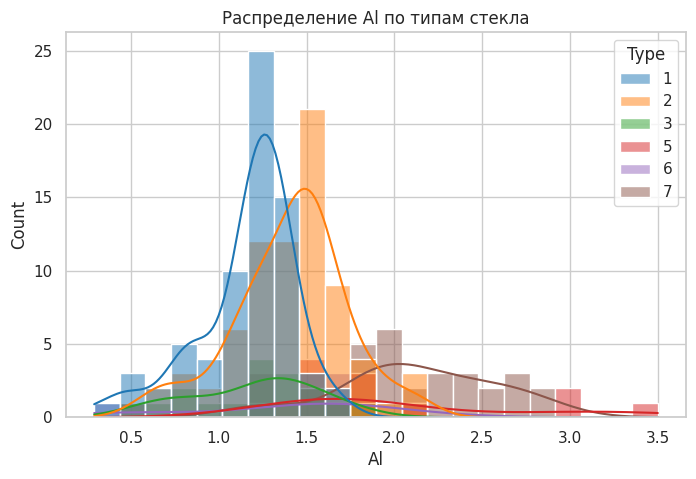

In [69]:
#Код для формирования второй гистограммы
if len(significant_features) >= 2:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=significant_features[1], hue="Type", palette="tab10", kde=True)
    plt.title(f"Распределение {significant_features[1]} по типам стекла")
    plt.show()

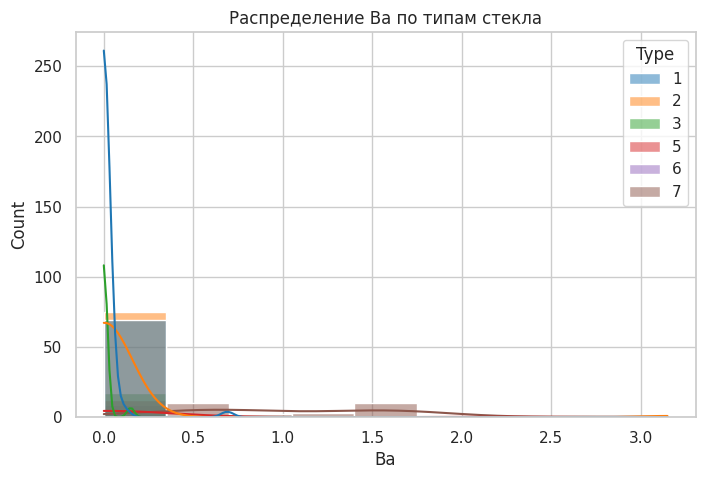

In [70]:
#Код для формирования третьей гистограммы
if len(significant_features) >= 3:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=significant_features[2], hue="Type", palette="tab10", kde=True)
    plt.title(f"Распределение {significant_features[2]} по типам стекла")
    plt.show()

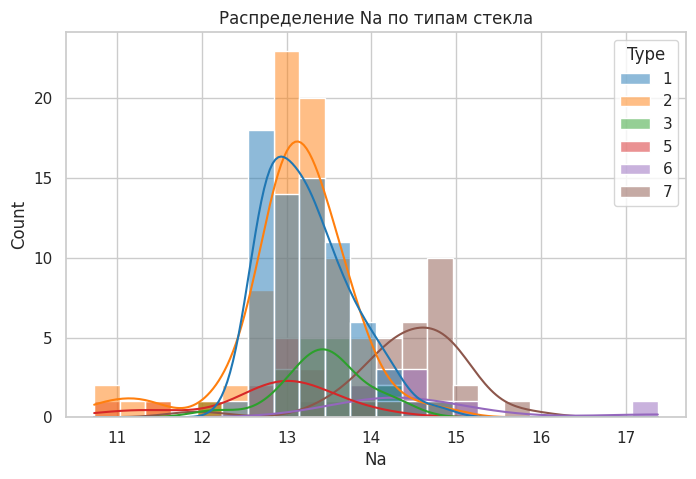

In [71]:
#Код для формирования четвёртой гистограммы
if len(significant_features) >= 4:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=significant_features[3], hue="Type", palette="tab10", kde=True)
    plt.title(f"Распределение {significant_features[3]} по типам стекла")
    plt.show()

Удалить из набора данных все несущественные признаки.

In [72]:
#Ваш код длдя формирования набора данных без несущественных признаков
columns_to_keep = significant_features + ['Type']
df_significant = df[columns_to_keep].copy()
df_significant.head()

,Mg,Al,Ba,Na,Type
0,4.49,1.10,0.0,13.64,1
1,3.60,1.36,0.0,13.89,1
2,3.55,1.54,0.0,13.53,1
3,3.69,1.29,0.0,13.21,1
4,3.62,1.24,0.0,13.27,1


Построить парный график для набора данных, состоящего из существенных признаков.

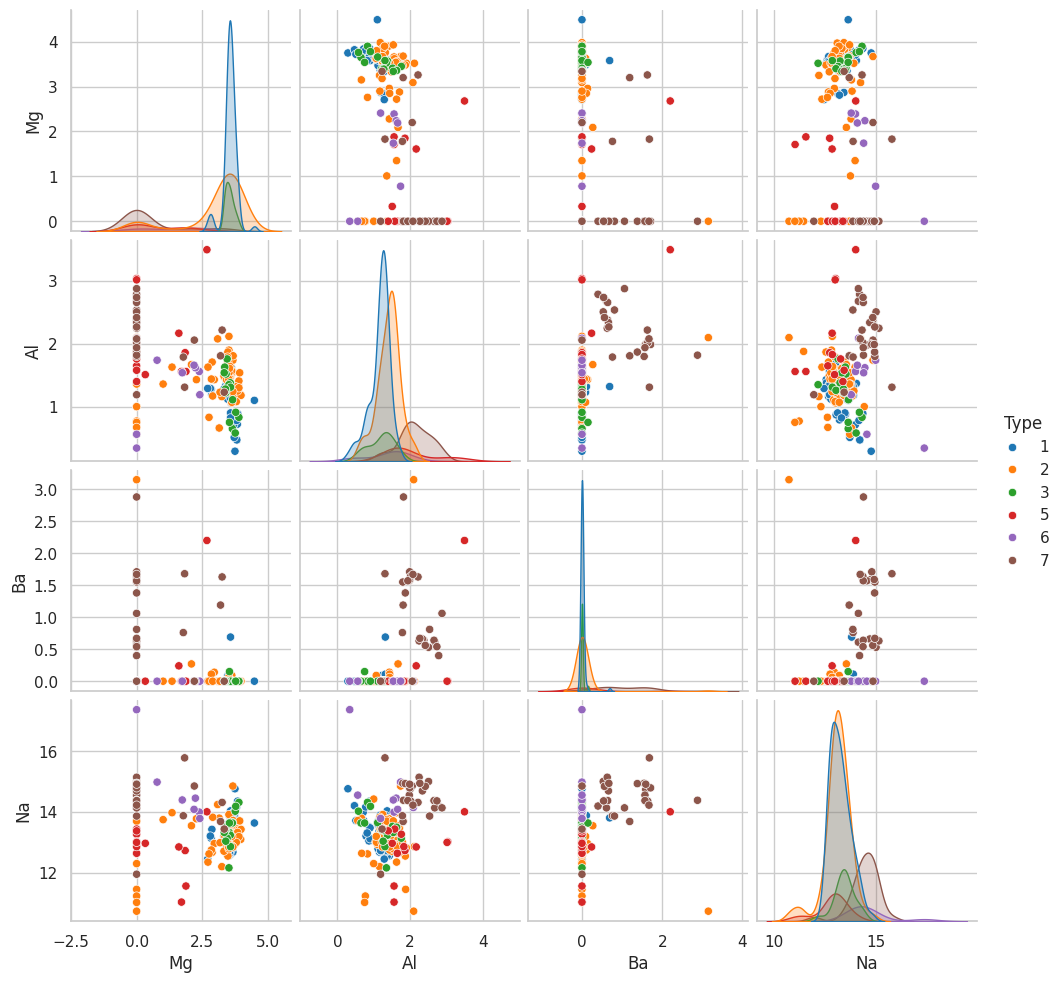

In [73]:
#Ваш код для построения парного графика
sns.pairplot(df_significant, hue='Type', palette='tab10')
plt.show()

Построить тепловую диаграмму для набора данных, состоящегно из существенных признаков

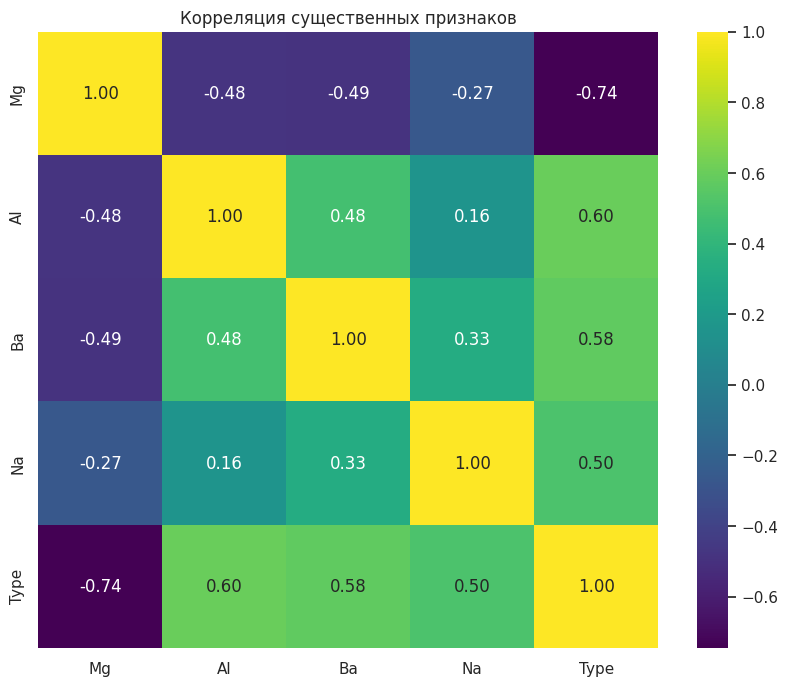

In [74]:
#Ваш код для построения тепловой диаграммы
plt.figure(figsize=(10, 8))
sns.heatmap(df_significant.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Корреляция существенных признаков")
plt.show()

Выводы по разделу 6.

# 7) Подготова данных для обучения

Сформировать обучающий набор данных, удалив из текущего набора данных признак Type.

Целевой признак в набор обучающих данных не включается.

Сформировать набор данных, состоящий из целевого признака.

In [75]:
#Ваш код для формирования указанных наборов данных
X = df_significant.drop('Type', axis=1)
y = df_significant['Type']

## 7.1) Выполнить нормализацию данных для набора существенных признаков.

In [76]:
#Ваш код для нормализации данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Mg,Al,Ba,Na
0,1.254639,-0.692442,-0.352877,0.284953
1,0.636168,-0.170460,-0.352877,0.591817
2,0.601422,0.190912,-0.352877,0.149933
3,0.698710,-0.310994,-0.352877,-0.242853
4,0.650066,-0.411375,-0.352877,-0.169205


## 7.2) Разделение набора данных

Разделить обучающий и целевой наборы данных на обучающую и тестовую выборки

**Блокнот принадлежит Furgon Inc. TM**

In [77]:
#Ваш код для разделения набора данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (149, 4)
Размер тестовой выборки: (65, 4)


# 8) Обучение модели

Обучить модель "Дерево решений".

In [78]:
#Создать объект классификатора "Дерево решений"
clf = DecisionTreeClassifier(random_state=42, max_depth=5)

In [79]:
#Обучить классификатор
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [80]:
#Выполнить следующий оператор для формирования области рисунка
plt.figure(figsize=(20, 10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

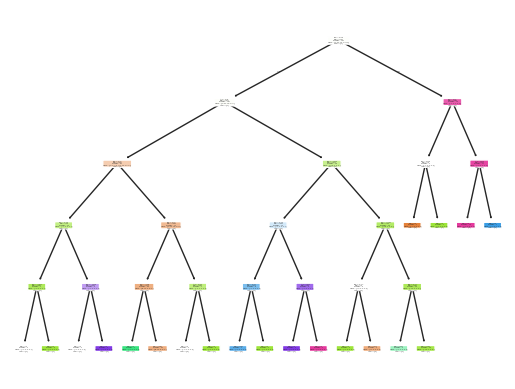

In [81]:
#Вывести изображение дерева решений с помощью функции tree.plot_tree
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True, rounded=True)
plt.show()

## 10) Оценка качества модели

Вычислить прогнозные значения для тестового набора данных.

In [82]:
#Ваш код для вычисления прогрнозных значений
y_pred = clf.predict(X_test)

Матрица несоответствий:
[[17  2  0  0  0  0]
 [ 7 12  3  1  0  0]
 [ 3  1  0  0  0  0]
 [ 0  1  0  5  0  0]
 [ 0  1  0  0  1  1]
 [ 1  0  0  0  0  9]]


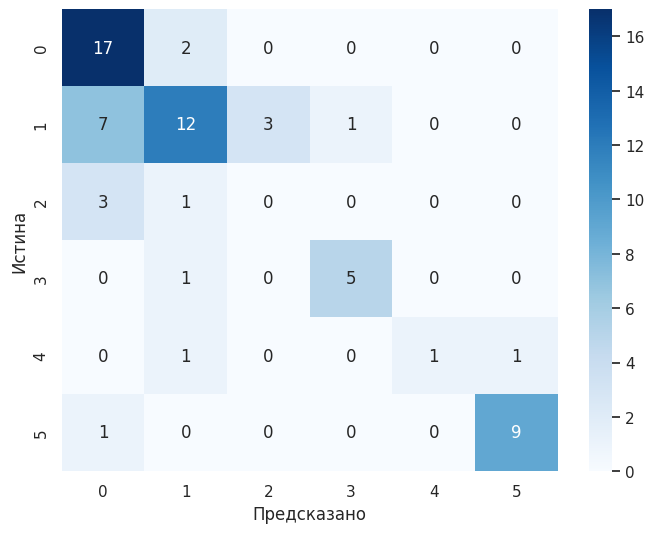

In [83]:
#Ваш код для вычисления матрицы несоответствий
cm = confusion_matrix(y_test, y_pred)
print("Матрица несоответствий:")
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказано')
plt.ylabel('Истина')
plt.show()

In [84]:
#Ваш код для вычисления precision score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Precision: {precision:.4f}")

Precision: 0.6888


In [85]:
#Ваш код для вычисления recall score
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Recall: {recall:.4f}")

Recall: 0.6769


In [86]:
#Ваш код для вычисления f1 score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.6622


#Выводы по разделу 10